In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [58]:
def func(x, *args):
    return sum([x ** i * args[i] for i in range(len(args))])


def func1(x, a1, a2, a3, a4, a5):
    return func(x, a1, a2, a3, a4, a5)


def func2(x, a1, a2, a3, a4):
    return func(x, a1, a2, a3, a4)


def func3(x, a1, a2, a3):
    return func(x, a1, a2, a3)


def func4(x, a1, a2, a3, a4, a5, a6, a7, a8):
    return func(x, a1, a2, a3, a4, a5, a6, a7, a8)


def func5(x, a1, a2, a3, a4, a5, a6):
    return func(x, a1, a2, a3, a4, a5, a6)

In [59]:
df = pd.read_csv("lab3.06_task1.csv")
line1 = df[df["line_id"] == 1]
line2 = df[df["line_id"] == 2]

### Площадь петли гистерезиса

In [60]:
popt1, _ = curve_fit(func4, line1["x"], line1["y"])
S1, _ = quad(lambda x: func(x, *popt1), -3, 3)

In [61]:
popt2, _ = curve_fit(func4, line2["x"], line2["y"])
S2, _ = quad(lambda x: func(x, *popt2), -3, 3)

In [62]:
S1 - S2

6.511921675097003

In [63]:
popt1, popt2

(array([ 1.08271710e+00,  1.39683312e+00, -3.67413203e-01, -5.58030865e-02,
         5.32814603e-02, -2.30791590e-04, -2.82341737e-03,  1.28495898e-04]),
 array([-1.07722963e+00,  1.31494207e+00,  3.51811462e-01, -2.81255775e-02,
        -4.75995876e-02, -4.47048710e-03,  2.46955654e-03,  3.77686268e-04]))

In [64]:
print(" ".join([f"{popt2[i]}x^{i}" for i in range(0, 8)]))

-1.0772296255204483x^0 1.314942065204007x^1 0.35181146195618246x^2 -0.028125577508023282x^3 -0.047599587572267676x^4 -0.0044704870969099015x^5 0.0024695565394225604x^6 0.0003776862675909724x^7


In [65]:
X = np.arange(-3, 3, 0.001)
up = [func4(x_i, *popt1) for x_i in X]
bot = [func4(x_i, *popt2) for x_i in X]

Text(0.1, 2.9, '$D$')

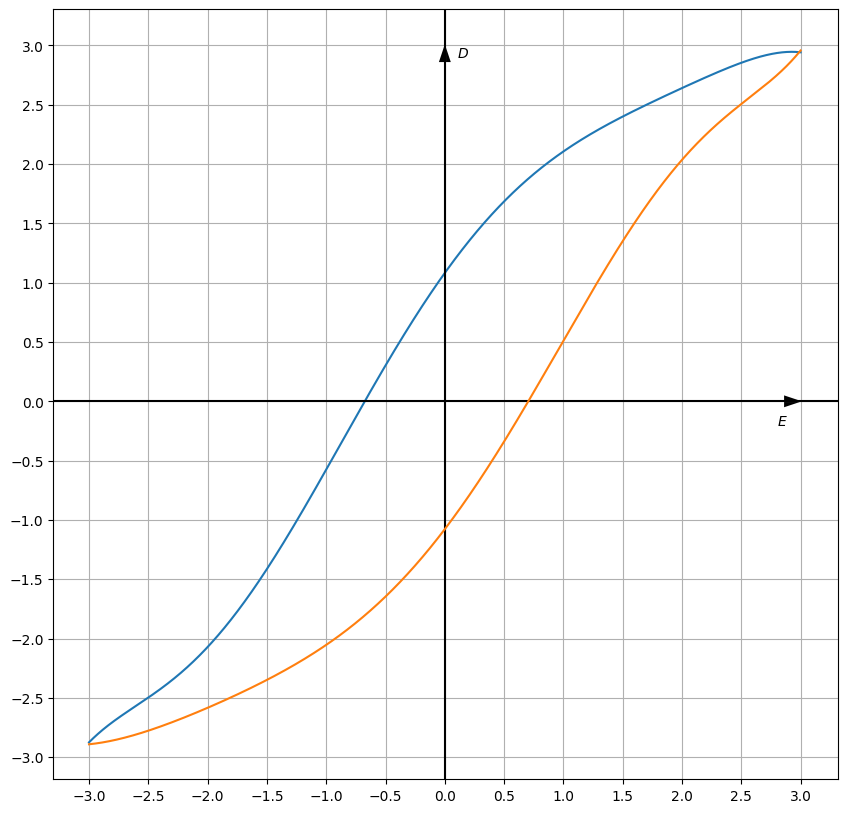

In [66]:
figure, axes = plt.subplots(figsize=(15, 10))
axes.set_aspect(1)
axes.set_xticks(np.arange(-3, 3.5, 0.5))
axes.set_yticks(np.arange(-3, 3.5, 0.5))
axes.plot(X, up)
axes.axvline(0, color="black")
axes.axhline(0, color="black")
axes.plot(X, bot)
axes.grid()
axes.arrow(3, 0, 0.01, 0, shape='full', lw=0, length_includes_head=True, head_width=0.1, color="black")
axes.arrow(0, 3, 0, 0.01, shape='full', lw=0, length_includes_head=True, head_width=0.1, color="black")
axes.text(2.8, -0.2, r"$E$")
axes.text(0.1, 2.9, r"$D$")

### Второе задание

In [67]:
C1 = 10 ** (-6)
S = 0.0005
d = 0.00005
R1 = 47000
R2 = 470000
eps0 = 8.85 * 10 ** (-12)

In [68]:
df = pd.read_csv("lab3.06_task2.csv")
df["E"] = df["X"] * df["Kx"] / d
df["D"] = df["Y"] * df["Ky"] * C1 / S
df["eps"] = df["D"] / (eps0 * df["E"])

In [69]:
df

,U,Kx,Ky,X,Y,E,D,eps
0,17.0,5.00,5.00,3.0,3.2,300000.0,0.032000,12052.730697
1,15.0,5.00,5.00,2.7,3.0,270000.0,0.030000,12554.927809
2,13.0,5.00,5.00,2.3,2.7,230000.0,0.027000,13264.554164
3,11.0,5.00,5.00,1.9,2.0,190000.0,0.020000,11894.142135
4,9.0,5.00,5.00,1.6,1.6,160000.0,0.016000,11299.435028
5,7.0,2.00,2.00,3.1,2.7,124000.0,0.010800,9841.443412
6,5.0,2.00,2.00,2.2,1.5,88000.0,0.006000,7704.160247
7,4.4,2.00,2.00,1.9,1.1,76000.0,0.004400,6541.778174
8,3.8,1.00,1.00,3.4,1.8,68000.0,0.003600,5982.053838
9,3.2,1.00,1.00,2.9,1.2,58000.0,0.002400,4675.628288


In [70]:
eps_popt, _ = curve_fit(func5, df["E"], df["eps"])
X = np.arange(0, df["E"].max(), 1)
Y = np.array([func5(x_i, *eps_popt) for x_i in X])

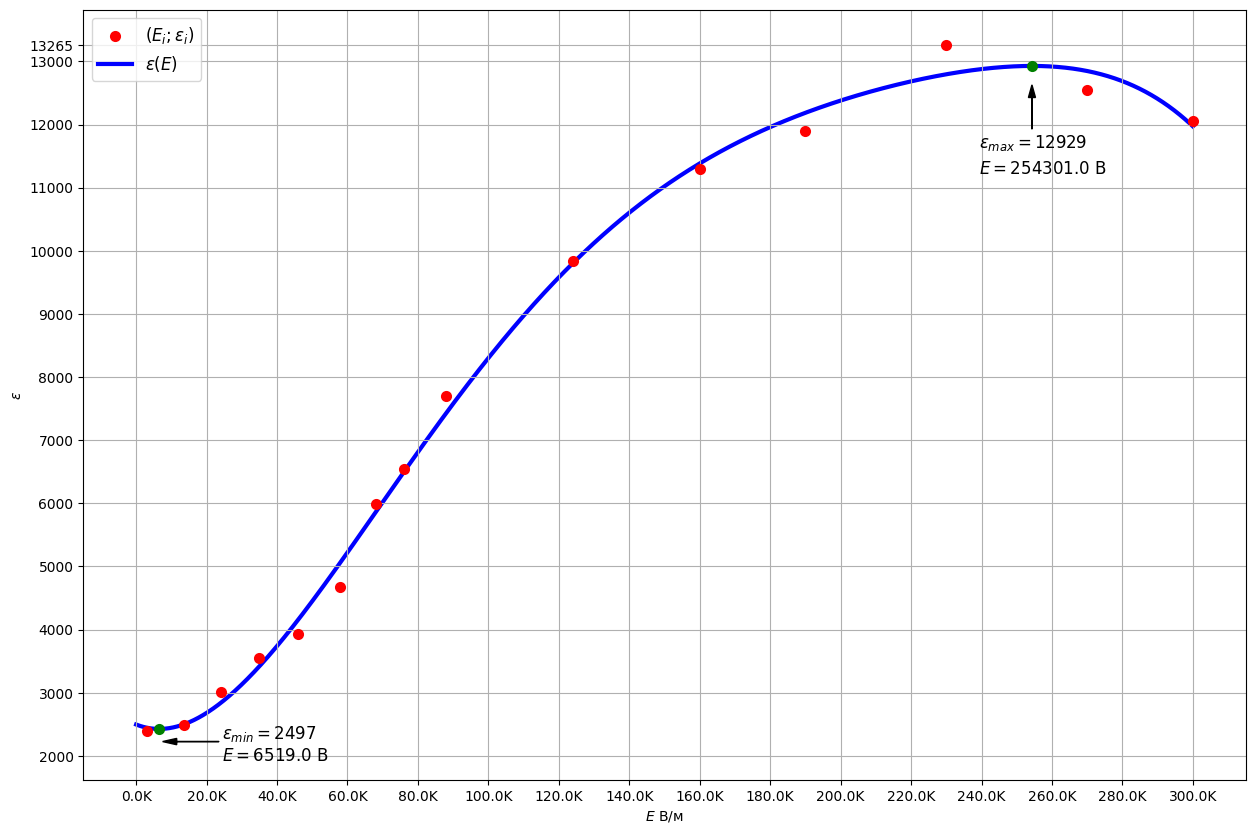

In [71]:
figure, axes = plt.subplots(figsize=(15, 10))
axes.set_axisbelow(True)
axes.set_xticks(list(np.arange(0, df["E"].max(), 20000)) + [df["E"].max()])
axes.set_xticklabels([f"{e / 1000}K" for e in np.arange(0, df["E"].max(), 20000)] + [f"{df['E'].max()/1000}K"])
axes.set_xlabel(r"$E$" + " В/м")
axes.set_ylabel(r"$\varepsilon$")
axes.set_yticks(list(np.arange(0, df["eps"].max(), 1000)) + [df["eps"].max()])
axes.grid()

# axes.scatter(0, Y[0], color="green", zorder=1, linewidths=4)

Y_max_ix = Y.argmax()
Y_min_ix = Y.argmin()

axes.scatter(X[Y_max_ix], Y[Y_max_ix], color="green", zorder=1, linewidths=2)
axes.scatter(X[Y_min_ix], Y[Y_min_ix], color="green", zorder=1, linewidths=2)

axes.arrow(X[Y_max_ix], Y[Y_max_ix] - 1000, 0, 500, shape='full', head_width=2000, head_length=200, color="black")
axes.text(X[Y_max_ix] - 15000, Y[Y_max_ix] - 1300, r"$\varepsilon_{max}=$" + rf"${round(Y[Y_max_ix])}$", fontsize="large")
axes.text(X[Y_max_ix] - 15000, Y[Y_max_ix] - 1700, rf"$E={X[Y_max_ix]}$" + " В", fontsize="large")



axes.scatter(df["E"], df["eps"], color="red", linewidths=2, label=r"$(E_{i};\varepsilon_{i})$", zorder=1)
axes.plot(X, Y, color="blue", linewidth=3, label=r"$\varepsilon(E)$", zorder=-1)

axes.arrow(X[Y_min_ix] + 17000, Y[Y_min_ix] - 200, -12000, 0, shape='full', head_width=100, head_length=4000, color="black")

axes.text(X[Y_min_ix] + 18000, Y[Y_min_ix] - 150, r"$\varepsilon_{min}=$" + rf"{round(Y[0])}", fontsize="large")
axes.text(X[Y_min_ix] + 18000, Y[Y_min_ix] - 500, rf"$E={X[Y_min_ix]}$" + " В", fontsize="large")


axes.legend(loc='upper left', fontsize="large")

In [72]:
X[Y_min_ix]

6519.0

In [73]:
X[Y_max_ix]

254301.0

In [74]:
Y[0]

2496.684539191905

In [75]:
D_popt, _ = curve_fit(func1, df["E"], df["D"])
X2 = np.arange(0, df["E"].max(), 1)
Y2 = [func1(x_i, *D_popt) for x_i in X]

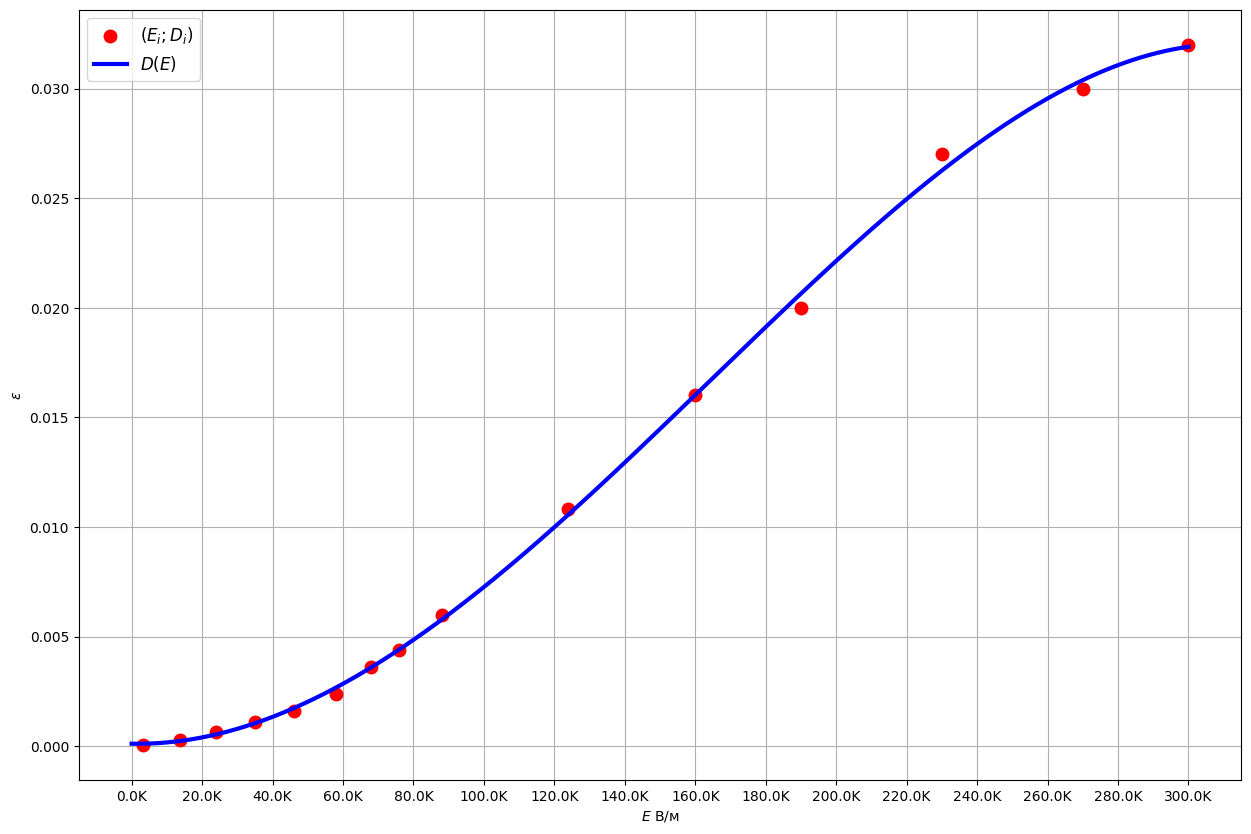

In [76]:
figure, axes = plt.subplots(figsize=(15, 10))
# axes.set_xticks(np.arange(-3, 3.5, 0.5))
# axes.set_yticks(np.arange(-3, 3.5, 0.5))
axes.set_axisbelow(True)
axes.set_xticks(list(np.arange(0, df["E"].max(), 20000)) + [df["E"].max()])
axes.set_xticklabels([f"{e / 1000}K" for e in np.arange(0, df["E"].max(), 20000)] + [f"{df['E'].max()/1000}K"])
axes.set_xlabel(r"$E$" + " В/м")
axes.set_ylabel(r"$\varepsilon$")
# axes.set_yticks(list(np.arange(0, df["D"].max(), 1000)) + [df["D"].max()])
axes.grid()

axes.scatter(df["E"], df["D"], color="red", linewidths=4, label=r"$(E_{i};D_{i})$")
axes.plot(X2, Y2, color="blue", linewidth=3, label=r"$D(E)$")
axes.legend(loc='upper left', fontsize="large")

In [78]:
Y2[Y_min_ix], Y2[Y_max_ix]

(0.00013237399860149625, 0.029004995470389424)

In [116]:
df.to_csv("lab3.06_task2_latex.csv")

In [117]:
df

,U,Kx,Ky,X,Y,E,D,eps
0,17.0,5.00,5.00,3.0,3.2,300000.0,0.032000,12052.730697
1,15.0,5.00,5.00,2.7,3.0,270000.0,0.030000,12554.927809
2,13.0,5.00,5.00,2.3,2.7,230000.0,0.027000,13264.554164
3,11.0,5.00,5.00,1.9,2.0,190000.0,0.020000,11894.142135
4,9.0,5.00,5.00,1.6,1.6,160000.0,0.016000,11299.435028
5,7.0,2.00,2.00,3.1,2.7,124000.0,0.010800,9841.443412
6,5.0,2.00,2.00,2.2,1.5,88000.0,0.006000,7704.160247
7,4.4,2.00,2.00,1.9,1.1,76000.0,0.004400,6541.778174
8,3.8,1.00,1.00,3.4,1.8,68000.0,0.003600,5982.053838
9,3.2,1.00,1.00,2.9,1.2,58000.0,0.002400,4675.628288


In [120]:
X[Y_max_ix]

228576.0

In [ ]:
import math

K_X = 5
X_C = 0.7
U_R_1 = K_X * X_C
R_1 = 47000
R_2 = 470000
C_1 = 10 ** -6
d = 0.0005

d_U = K_X * 0.05
d_R_1 = R_1 * 0.1
d_R_2 = R_2 * 0.1
d_d = d * 0.1

E = (R_1 + R_2) / R_1 * (U_R_1 / d)

d_E = math.sqrt((((R_1 + R_2) / R_1 * (1 / d)) * d_U) ** 2 + (((- R_2) / (R_1 ** 2) * (U_R_1 / d)) * d_R_1) ** 2 \
    + (((1) / R_1 * (U_R_1 / d)) * d_R_2) ** 2 + ((- (R_1 + R_2) / R_1 * (U_R_1 / (d ** 2))) * d_d) ** 2)
print(d_E)

S = 500 * (10 ** -6)
K_Y = 5
Y_S = 2.95
Y_r = 1.15

U_C_1 = K_Y * Y_S

d_C = C_1 * 0.1
d_U_C = K_Y * 0.05
d_S = S * 0.1

d_D = math.sqrt((C_1 / S * d_U_C) ** 2 + (U_C_1 / S * d_C) ** 2 + (- U_C_1 * C_1 / (S **2) * d_S) ** 2)

print(d_D)

U_f = K_Y * Y_r
d_U_f = d_U_C

d_P = math.sqrt((C_1 / S * d_U_f) ** 2 + (U_f / S * d_C) ** 2 + (- U_f * C_1 / (S **2) * d_S) ** 2)

print(d_P)


13694.524453225822
0.004201785334830898
0.0017014699527173557
